<a href="https://colab.research.google.com/github/jithesh9539/CMPE_255_hotel/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns
import folium
from folium import plugins
from google.colab import files
uploaded=files.upload()


Saving hotel_bookings.csv to hotel_bookings.csv


 
**Data Load: Load hotel booking demand dataset into a dataframe**

In [37]:
df1=pd.read_csv("hotel_bookings.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
df1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
df1.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Identifying null values in the dataset** 

In [42]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Replacing missing values**

In [43]:
replace= {"children":0,"country":"None","agent":0,"company":0}
df1= df1.fillna(replace)

In [44]:
df1.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [45]:
df1['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [46]:
df1['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

**Graph to understand the number of cancellation made by Resort and City Hotel**

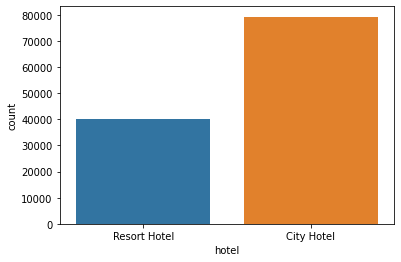

In [47]:
sns.countplot(x='hotel',data=df1)
plt.show()

In [48]:
df1.shape

(119390, 32)

**Obtaining the target value to identify the percentage of cancellation by comparing with every columns in the table**

In [49]:
df1['tget']=np.where(df1['is_canceled'].isin(['1']),1,0)


In [50]:
df1['tget'].mean()

0.37041628277075134

In [51]:
df1.groupby('country')['tget'].mean()


country
ABW     0.000000
AGO     0.566298
AIA     0.000000
ALB     0.166667
AND     0.714286
ARE     0.843137
ARG     0.252336
ARM     0.250000
ASM     0.000000
ATA     0.000000
ATF     0.000000
AUS     0.251174
AUT     0.182106
AZE     0.529412
BDI     0.000000
BEL     0.202391
BEN     1.000000
BFA     0.000000
BGD     0.750000
BGR     0.160000
BHR     0.800000
BHS     0.000000
BIH     0.230769
BLR     0.346154
BOL     0.000000
BRA     0.373201
BRB     0.000000
BWA     0.000000
CAF     0.000000
CHE     0.247399
CHL     0.246154
CHN     0.462462
CIV     0.333333
CMR     0.000000
CN      0.198593
COL     0.323944
COM     0.000000
CPV     0.500000
CRI     0.052632
CUB     0.000000
CYM     0.000000
CYP     0.215686
CZE     0.216374
DEU     0.167147
DJI     0.000000
DMA     0.000000
DNK     0.250575
DOM     0.571429
DZA     0.203883
ECU     0.296296
EGY     0.343750
ESP     0.254085
EST     0.216867
ETH     0.333333
FIN     0.154362
FJI     1.000000
FRA     0.185694
FRO     0.800000
GAB   

**Finding good discrimanators for buiding a model**

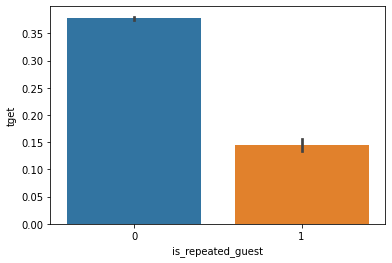

In [52]:
from numpy import mean
ax=sns.barplot(x='is_repeated_guest',y='tget',data=df1,estimator=mean)

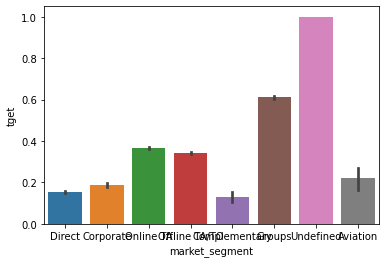

In [53]:
ax=sns.barplot(x='market_segment',y='tget',data=df1,estimator=mean)

In [54]:
df1.groupby('market_segment')['tget'].mean()

market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: tget, dtype: float64

**Note :As undefined column is having only two datas we can ignore ny not taking it into consideration even though the mean is 1.00**

In [55]:
df1.groupby('market_segment')['tget'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: tget, dtype: int64

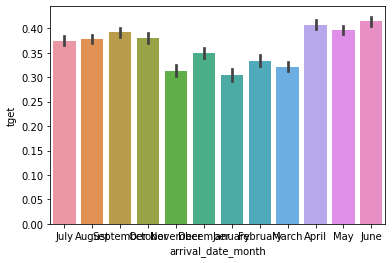

In [56]:
ax=sns.barplot(x='arrival_date_month',y='tget',data=df1,estimator=mean)

In [57]:
df1.groupby('arrival_date_month')['tget'].mean()

arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: tget, dtype: float64

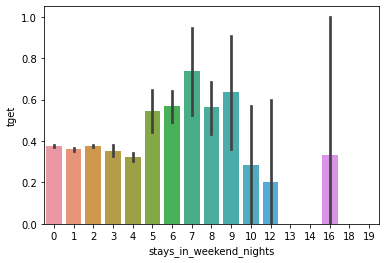

In [58]:
ax=sns.barplot(x='stays_in_weekend_nights',y='tget',data=df1,estimator=mean)


In [59]:
df1.groupby('stays_in_weekend_nights')['tget'].mean()

stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: tget, dtype: float64

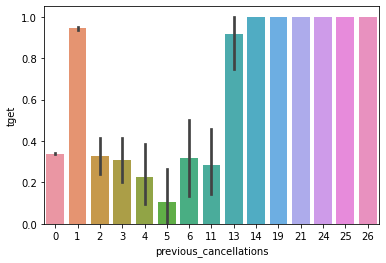

In [60]:
ax=sns.barplot(x='previous_cancellations',y='tget',data=df1,estimator=mean)

In [61]:
df1.groupby('previous_cancellations')['tget'].value_counts()

previous_cancellations  tget
0                       0       74624
                        1       38282
1                       1        5714
                        0         337
2                       0          78
                        1          38
3                       0          45
                        1          20
4                       0          24
                        1           7
5                       0          17
                        1           2
6                       0          15
                        1           7
11                      0          25
                        1          10
13                      1          11
                        0           1
14                      1          14
19                      1          19
21                      1           1
24                      1          48
25                      1          25
26                      1          26
Name: tget, dtype: int64

**Feature Engineering**

In [62]:
df1['previous_cancel']=np.where(df1['previous_cancellations'].isin(['0']),0,1)


In [63]:
df1.groupby('previous_cancel')['tget'].mean()

previous_cancel
0    0.339061
1    0.916410
Name: tget, dtype: float64

In [64]:
target=['tget']
cnum=['adr','lead_time','stays_in_weekend_nights']
cchar=['total_of_special_requests','customer_type','reserved_room_type','distribution_channel','market_segment','previous_cancel']

In [65]:
X_dum=pd.get_dummies(df1[cchar],drop_first=True)

In [66]:
X_all=pd.concat([df1[cnum],X_dum],axis=1,join='inner')


In [67]:
X_var=X_all
Y_var=df1['tget']

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X_var,Y_var,test_size=0.3,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


dtree=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=7,min_samples_leaf=5)
dtree.fit(X_train,y_train)

rf_1000=RandomForestClassifier(n_estimators=1000,
                               random_state=2,
                               criterion='gini',
                               max_features='auto',
                               max_depth=7)
rf_1000.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression on test set',format(logreg.score(X_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression on test set 0.7701370857414077


In [69]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of decisison tree on test set',format(dtree.score(X_test,y_test)))

Accuracy of decisison tree on test set 0.7845994918614065


In [70]:
y_rf=rf_1000.predict(X_test)
print('Accuracy of random forest algo on test set',format(rf_1000.score(X_test,y_test)))


Accuracy of random forest algo on test set 0.7916352570008655
